In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())



batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']


numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [2]:
#1. Minimum feature
# train prim_test secondary_test
bat1_2 = {**batch1, **batch2}

prim_test_min=[]
prim_test_cycle=[]
Train_min=[]
Train_cycle=[]
secondary_cycle=[]
secondary_min=[]

for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    mi,cycle=np.min(diff),bat_dict[j]['cycle_life'].tolist()
    if i==83:
        prim_test_min.append(mi)
        prim_test_cycle.append(cycle)
        break
    if i%2==0:
        prim_test_min.append(mi)
        prim_test_cycle.append(cycle)
    if i%2==1:
        Train_min.append(mi)
        Train_cycle.append(cycle)

for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    mi,cycle=np.min(diff),bat_dict[j]['cycle_life'].tolist()
    secondary_min.append(mi)
    secondary_cycle.append(cycle)

In [3]:
print(Train_cycle)

[[[2160.0]], [[1434.0]], [[1074.0]], [[870.0]], [[788.0]], [[719.0]], [[857.0]], [[788.0]], [[559.0]], [[1017.0]], [[870.0]], [[860.0]], [[709.0]], [[731.0]], [[742.0]], [[704.0]], [[617.0]], [[966.0]], [[702.0]], [[616.0]], [[300.0]], [[438.0]], [[444.0]], [[511.0]], [[477.0]], [[483.0]], [[494.0]], [[461.0]], [[489.0]], [[527.0]], [[461.0]], [[468.0]], [[498.0]], [[492.0]], [[520.0]], [[463.0]], [[478.0]], [[459.0]], [[429.0]], [[462.0]], [[487.0]]]


In [4]:
#2. Variance
# train prim_test secondary_test
prim_test_var=[]
Train_var=[]
secondary_var=[]
for i,j in enumerate(bat1_2.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    var=np.var(diff)
    if i==83:
        prim_test_var.append(var)
        break
    if i%2==0:
        prim_test_var.append(var)
    if i%2==1:
        Train_var.append(var)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var=np.var(diff)
    secondary_var.append(var)

In [5]:
#3. Skewness
# train prim_test secondary_test
from scipy.stats import skew
prim_test_skew=[]
Train_skew=[]
secondary_skew=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    sk=skew(diff)
    if i==83:
        prim_test_skew.append(sk)
        break
    if i%2==0:
        prim_test_skew.append(sk)
    if i%2==1:
        Train_skew.append(sk)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    sk=skew(diff)
    secondary_skew.append(sk)

In [6]:
#4. Kutosis
# train prim_test secondary_test
from scipy.stats import kurtosis
prim_test_kurt=[]
Train_kurt=[]
secondary_kurt=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    kurt=kurtosis(diff,fisher=True)
    if i==83:
        prim_test_kurt.append(kurt)
        break
    if i%2==0:
        prim_test_kurt.append(kurt)
    if i%2==1:
        Train_kurt.append(kurt)
for i,j in enumerate(batch3.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    kurt=kurtosis(diff,fisher=True)
    secondary_kurt.append(kurt)

In [7]:
#5. Discharge Capacity, Cycle2
# train prim_test secondary_test
prim_test_Cycle2=[]
Train_Cycle2=[]
secondary_Cycle2=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Cycle2=np.max(bat_dict[j]['cycles']['1']['Qdlin'])
    if i==83:
        prim_test_Cycle2.append(Cycle2)
        break
    if i%2==0:
        prim_test_Cycle2.append(Cycle2)
    if i%2==1:
        Train_Cycle2.append(Cycle2)
for i,j in enumerate(batch3.keys()):
    Cycle2=np.max(bat_dict[j]['cycles']['1']['Qdlin'])
    secondary_Cycle2.append(Cycle2)

In [8]:
#6. Difference between max discharge capacity and cycle 2
# train prim_test secondary_test
prim_test_max_Q=[]
Train_max_Q=[]
secondary_max_Q=[]
for i,j in enumerate(bat1_2.keys()):
    a=len(bat1_2.keys())
    Cycle2=np.max(bat_dict[j]['cycles']['1']['Qdlin'])
    max_Q=[]
    for k in range(1,100):
        max_q=np.max(bat_dict[j]['cycles']['{}'.format(k)]['Qdlin'])
        max_Q.append(max_q)
    max_Q=np.array(max_Q)
    max_Q1=np.max(max_Q)
    if i==83:
        prim_test_max_Q.append(max_Q1-Cycle2)
        break
    if i%2==0:
        prim_test_max_Q.append(max_Q1-Cycle2)
    if i%2==1:
        Train_max_Q.append(max_Q1-Cycle2)
for i,j in enumerate(batch3.keys()):
    max_Q=[]
    for k in range(100):
        max_q=np.max(bat_dict[j]['cycles']['{}'.format(k)]['Qdlin'])
        max_Q.append(max_q)
    max_Q=np.array(max_Q)
    max_Q1=np.max(max_Q)
    secondary_max_Q.append(max_Q1-Cycle2)

In [9]:
print(Train_max_Q)# 2(b1c3), 9(b1c21)
print(prim_test_max_Q)#3(b1c4),9(b1c20)
print(secondary_max_Q)

[0.006971180786753628, 44.273065200752185, 0.004664037804991805, 0.0038241973628740933, 0.0070733979281842885, 0.007992011400400845, 0.006661550761108748, 0.0035516564701978393, 31.902455812066822, 0.007496486191115093, 0.003598670371326662, 0.0033014981546062305, 0.003338420891335847, 0.003073847664221141, 0.003289266426053983, 0.423823829283696, 0.003107095634621082, 0.004321226053689342, 0.003745776186018457, 0.003051856857552826, 0.00354914976672549, 0.004749315288500089, 0.002276964988057628, 0.003834562849361234, 0.0036524478091706225, 0.0023476932091013314, 0.006149258232411636, 0.0012896113749305549, 0.005033106044756819, 0.0034526918920074756, 0.004505020914015168, 0.004665831538830378, 0.005301837664247966, 0.0054549381034518785, 0.005236645397197925, 0.0040021804891621215, 0.0044613516076839055, 0.0060977709662961566, 0.00631937419571349, 0.005303099424594615, 0.004737898012353359]
[0.00730370366468347, 0.005689614963479306, 47.774291628193716, 0.005630455827503544, 0.005391

In [10]:
prim_test_min2=np.log10(np.abs(np.array(prim_test_min))).reshape(-1,1)
prim_test_cycle2=np.array(prim_test_cycle).reshape(-1,1)
Train_min1=np.log10(np.abs(np.array(Train_min))).reshape(-1,1)
Train_cycle1=np.array(Train_cycle).reshape(-1,1)
secondary_cycle3=np.array(secondary_cycle).reshape(-1,1)
secondary_min3=np.log10(np.abs(np.array(secondary_min))).reshape(-1,1)

prim_test_var2=np.log10(np.abs(np.array(prim_test_var))).reshape(-1,1)
Train_var1=np.log10(np.abs(np.array(Train_var))).reshape(-1,1)
secondary_var3=np.log10(np.abs(np.array(secondary_var))).reshape(-1,1)

prim_test_skew2=np.log10(np.abs(np.array(prim_test_skew))).reshape(-1,1)
Train_skew1=np.log10(np.abs(np.array(Train_skew))).reshape(-1,1)
secondary_skew3=np.log10(np.abs(np.array(secondary_skew))).reshape(-1,1)

prim_test_kurt2=np.log10(np.abs(np.array(prim_test_kurt))).reshape(-1,1)
Train_kurt1=np.log10(np.abs(np.array(Train_kurt))).reshape(-1,1)
secondary_kurt3=np.log10(np.abs(np.array(secondary_kurt))).reshape(-1,1)

prim_test_Cycle22=np.array(prim_test_Cycle2).reshape(-1,1)
Train_Cycle21=np.array(Train_Cycle2).reshape(-1,1)
secondary_Cycle23=np.array(secondary_Cycle2).reshape(-1,1)

prim_test_max_Q2=np.array(prim_test_max_Q).reshape(-1,1)
Train_max_Q1=np.array(Train_max_Q).reshape(-1,1)
secondary_max_Q3=np.array(secondary_max_Q).reshape(-1,1)

In [11]:
def Z_score(Train,prim_test,secondary):
    Z1=(Train-np.mean(Train))/np.std(Train)
    Z2=(prim_test-np.mean(Train))/np.std(Train)
    Z3=(secondary-np.mean(Train))/np.std(Train)
    return Z1, Z2, Z3

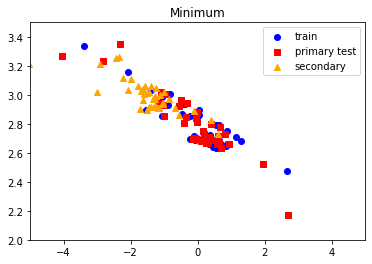

In [12]:
#1. Min Q100-10(V) 
cycle1=np.log10(Train_cycle1)
cycle2=np.log10(prim_test_cycle2)
cycle3=np.log10(secondary_cycle3)

Z1_1,Z1_2,Z1_3= Z_score(Train_min1,prim_test_min2,secondary_min3)

plt.scatter(Z1_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z1_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z1_3,cycle3,color='orange',marker='^',label='secondary')
plt.axis([-5,5,2,3.5])
plt.title('Minimum')
plt.legend()
plt.show()

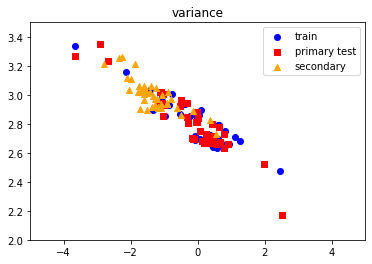

In [13]:
#2. Variance Q100-10(V)
Z2_1,Z2_2,Z2_3= Z_score(Train_var1,prim_test_var2,secondary_var3)

plt.scatter(Z2_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z2_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z2_3,cycle3,color='orange',marker='^',label='secondary')
plt.axis([-5,5,2,3.5])
plt.title('variance')
plt.legend()
plt.show()

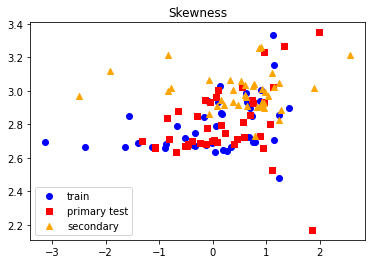

In [14]:
#3. Skewness
Z3_1,Z3_2,Z3_3=Z_score(Train_skew1,prim_test_skew2,secondary_skew3)

plt.scatter(Z3_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z3_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z3_3,cycle3,color='orange',marker='^',label='secondary')
#plt.axis([-5,5,2,3.5])
plt.title('Skewness')
plt.legend()
plt.show()

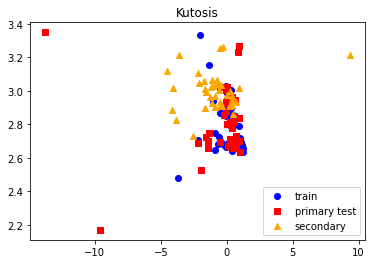

In [15]:
#4. Kutosis
Z4_1,Z4_2,Z4_3= Z_score(Train_kurt1,prim_test_kurt2,secondary_kurt3)

plt.scatter(Z4_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z4_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z4_3,cycle3,color='orange',marker='^',label='secondary')
#plt.axis([-5,5,2,3.5])
plt.title('Kutosis')
plt.legend()
plt.show()

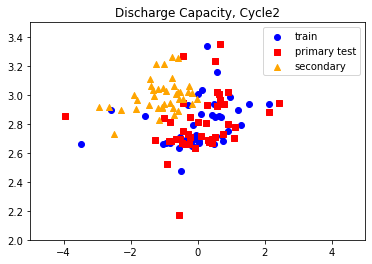

In [16]:
#5. Discharge Capacity, Cycle2
Z5_1,Z5_2,Z5_3= Z_score(Train_Cycle21,prim_test_Cycle22,secondary_Cycle23)

plt.scatter(Z5_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z5_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z5_3,cycle3,color='orange',marker='^',label='secondary')
plt.axis([-5,5,2,3.5])
plt.title('Discharge Capacity, Cycle2')
plt.legend()
plt.show()

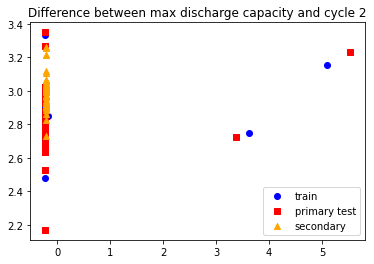

In [17]:
#6. Difference between max discharge capacity and cycle 2
Z6_1,Z6_2,Z6_3= Z_score(Train_max_Q1,prim_test_max_Q2,secondary_max_Q3)

plt.scatter(Z6_1,cycle1,color='blue',marker='o',label='train')
plt.scatter(Z6_2,cycle2,color='red',marker='s',label='primary test')
plt.scatter(Z6_3,cycle3,color='orange',marker='^',label='secondary')
#plt.axis([-0.25,-0.1,2,3.5])
plt.title('Difference between max discharge capacity and cycle 2')
plt.legend()
plt.show()

In [18]:
# 여기서 4개 cell 의 노이즈가 심하다.

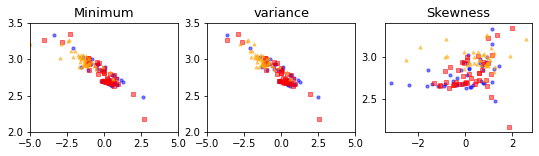

<Figure size 432x288 with 0 Axes>

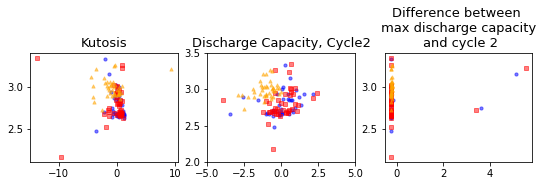

In [19]:
fig=plt.figure(figsize=(9,2))
ax1=fig.add_subplot(1,3,1)
plt.scatter(Z1_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z1_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z1_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
plt.axis([-5,5,2,3.5])
plt.title('Minimum',fontsize=13)

ax2=fig.add_subplot(1,3,2)
plt.scatter(Z2_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z2_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z2_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
plt.axis([-5,5,2,3.5])
plt.title('variance',fontsize=13)

ax3=fig.add_subplot(1,3,3)
plt.scatter(Z3_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z3_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z3_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
#plt.axis([-5,5,2,3.5])
plt.title('Skewness',fontsize=13)
plt.show()

plt.clf()
fig=plt.figure(figsize=(9,2))
ax4=fig.add_subplot(1,3,1)
plt.scatter(Z4_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z4_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z4_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
#plt.axis([-5,5,2,3.5])
plt.title('Kutosis',fontsize=13)

ax5=fig.add_subplot(1,3,2)
plt.scatter(Z5_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z5_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z5_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
plt.axis([-5,5,2,3.5])
plt.title('Discharge Capacity, Cycle2',fontsize=13)

ax6=fig.add_subplot(1,3,3)
plt.scatter(Z6_1,cycle1,color='blue',marker='o',alpha=0.5,s=10)
plt.scatter(Z6_2,cycle2,color='red',marker='s',alpha=0.5,s=10)
plt.scatter(Z6_3,cycle3,color='orange',marker='^',alpha=0.5,s=10)
#plt.axis([-0.25,-0.1,2,3.5])
plt.title('Difference between \n max discharge capacity \n and cycle 2',fontsize=13)
plt.show()

In [20]:
#min,var,skew,kurt,cycle2,max-cycle2, 정답cycle
Train=np.hstack([Z1_1,Z2_1,Z3_1,Z4_1,Z5_1,Z6_1])
label=cycle1.ravel()
Train.shape, label.shape

((41, 6), (41,))

In [21]:
#elasticnet
from sklearn.linear_model import ElasticNetCV
regr=ElasticNetCV(cv=4)
regr.fit(Train,label)

ElasticNetCV(cv=4)

In [22]:
print('Elastic Net CV alpha:',regr.alpha_)
print('Elastic Net CV coef:',regr.coef_)
print('Elastic Net CV intercept:',regr.intercept_)

Elastic Net CV alpha: 0.0013565637835357446
Elastic Net CV coef: [-0.14046351 -0.          0.00391126 -0.02817497  0.03693923  0.00207329]
Elastic Net CV intercept: 2.793969897643637


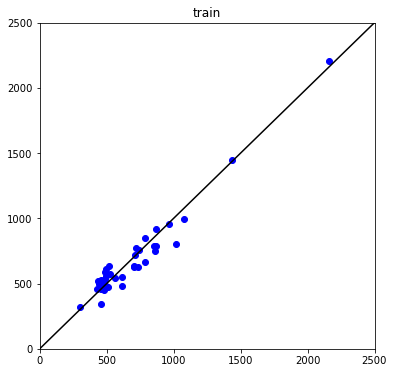

In [23]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
pred=regr.predict(Train)
plt.scatter(10**label,10**pred,color='blue',marker='o')
plt.title('train')
plt.axis([0,2500,0,2500])
plt.show()

In [24]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(10**label,10**pred))
MAPE1=MAPE(10**label,10**pred)
print('train RMSE, Mean Absolute Percentage Error')
rmse1,MAPE(10**label,10**pred)

train RMSE, Mean Absolute Percentage Error


(74.4965100469171, 9.829337244492665)

In [25]:
# prim test data 만들기
Train2=np.hstack([Z1_2,Z2_2,Z3_2,Z4_2,Z5_2,Z6_2])
label2=cycle2.ravel()
Train2.shape, label2.shape


((43, 6), (43,))

In [26]:
pred2=regr.predict(Train2)

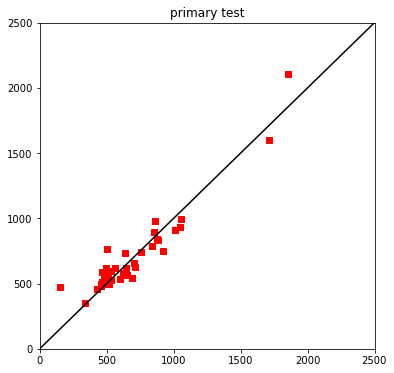

In [27]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label2,10**pred2,color='red',marker='s')
plt.title('primary test')
plt.axis([0,2500,0,2500])
plt.show()

In [28]:
rmse2=np.sqrt(mean_squared_error(10**label2,10**pred2))
MAPE2=MAPE(10**label2,10**pred2)
print('primary test RMSE, Mean Absolute Percentage Error')
rmse2,MAPE(10**label2,10**pred2)

primary test RMSE, Mean Absolute Percentage Error


(214.0194245433953, 17.013316287228584)

In [29]:
# secondary test data 만들기
Train3=np.hstack([Z1_3,Z2_3,Z3_3,Z4_3,Z5_3,Z6_3])
label3=cycle3.ravel()
Train3.shape, label3.shape

((40, 6), (40,))

In [30]:
pred3=regr.predict(Train3)

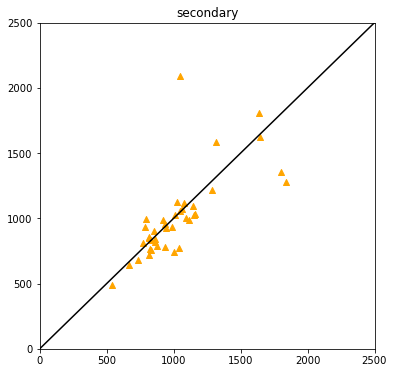

In [31]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^')
plt.title('secondary')
plt.axis([0,2500,0,2500])
plt.show()

In [32]:
rmse3=np.sqrt(mean_squared_error(10**label3,10**pred3))
MAPE3=MAPE(10**label3,10**pred3)
print('secondary test RMSE, Mean Absolute Percentage Error')
rmse3,MAPE(10**label3,10**pred3)

secondary test RMSE, Mean Absolute Percentage Error


(225.9690083303986, 11.651373742390557)

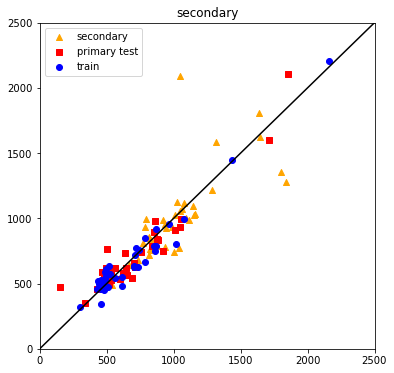

In [33]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**pred2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**pred,color='blue',marker='o',label='train')
plt.title('secondary')
plt.axis([0,2500,0,2500])
plt.legend()
plt.show()

In [34]:
s_res=(10**pred3)-(10**label3)
p_res=(10**pred2)-(10**label2)
print(p_res.shape,s_res.shape)

s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])
print(his,his.shape)

(43,) (40,)
[[ 255.05578152]
 [1230.55816802]
 [-111.66123221]
 [  97.17880129]
 [ -58.89382688]
 [ -47.34359169]
 [ 116.65391837]
 [-148.93042604]
 [ -10.38620025]
 [-105.92651298]
 [  38.39241875]
 [ -56.10522045]
 [-164.26547822]
 [ -31.34117246]
 [ -13.16483241]
 [ -48.12630104]
 [ -26.92120183]
 [ -46.85705335]
 [-114.63585047]
 [ -84.7828148 ]
 [ -62.70442796]
 [ 321.93845349]
 [  16.40320615]
 [  55.96569901]
 [  59.20008   ]
 [  38.95287311]
 [  56.88046563]
 [  58.48758197]
 [ 260.35102938]
 [  65.51786791]
 [ 125.41695125]
 [  24.16883346]
 [  20.94685202]
 [  65.12406259]
 [ -20.92761522]
 [  88.16145275]
 [  61.78671812]
 [  45.19970698]
 [  61.4281622 ]
 [ 123.50373075]
 [  24.41238876]
 [  29.26948609]
 [ -83.18069067]
 [  18.54318309]
 [   7.23893725]
 [-126.33679693]
 [   8.08445106]
 [ -70.48113465]
 [ -23.6952302 ]
 [-554.03250462]
 [   6.8734502 ]
 [-269.9523135 ]
 [  42.37100033]
 [-101.40386258]
 [-154.40635553]
 [  31.68289933]
 [ -35.60941642]
 [ -88.97448551]
 [

(0.0, 25.0)

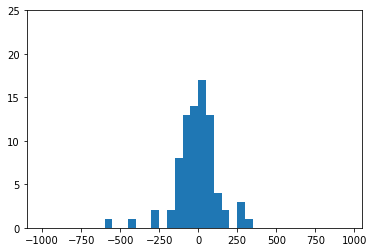

In [35]:
bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

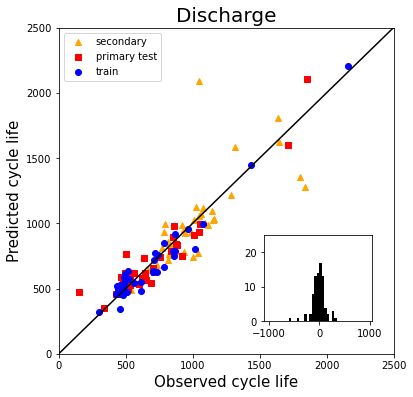

In [36]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**pred3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**pred2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**pred,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=15)
plt.ylabel('Predicted cycle life',size=15)
plt.axis([0,2500,0,2500])
plt.title('Discharge',size=20)
plt.legend()
ax_sub=plt.axes([0.6,0.2,0.25,0.2])
plt.ylim(0,25)
ax_sub.hist(his,bins,color='black')
plt.show()

In [37]:
print('             RMSE(cycles)')
print('Train        Primary test       Secondary test')
print(round(rmse1,1),'          ',round(rmse2,1),'             ',round(rmse3,1))

             RMSE(cycles)
Train        Primary test       Secondary test
74.5            214.0               226.0


In [38]:
print('         Mean percent error(%)')
print('Train        Primary test       Secondary test')
print(round(MAPE1,1),'          ',round(MAPE2,1),'               ',round(MAPE3,1))

         Mean percent error(%)
Train        Primary test       Secondary test
9.8            17.0                 11.7


In [39]:
Train.shape , label.shape

((41, 6), (41,))

C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.055547544960906706, tolerance: 0.00010703521221153374
  positive)
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002165355220948989, tolerance: 0.00010703521221153374
  positive)


<function matplotlib.pyplot.show(close=None, block=None)>

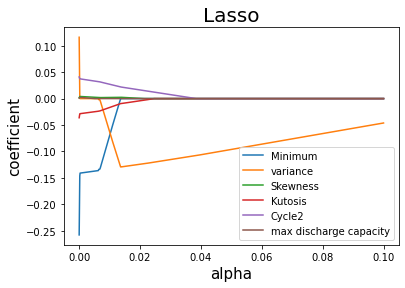

In [40]:
Y=[]
X=[]
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
for i in np.linspace(0,0.1,1000):
    regrplot=Lasso(alpha=i)
    regrplot.fit(Train,label)
    Y.append(regrplot.coef_)
    X.append(i)
Y_=np.array(Y)    
plt.plot(X,Y_[:,0],label='Minimum')
plt.plot(X,Y_[:,1],label='variance')
plt.plot(X,Y_[:,2],label='Skewness')
plt.plot(X,Y_[:,3],label='Kutosis')
plt.plot(X,Y_[:,4],label='Cycle2')
plt.plot(X,Y_[:,5],label='max discharge capacity')
plt.title('Lasso',size=20)
plt.xlabel('alpha',size=15)
plt.ylabel('coefficient',size=15)
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

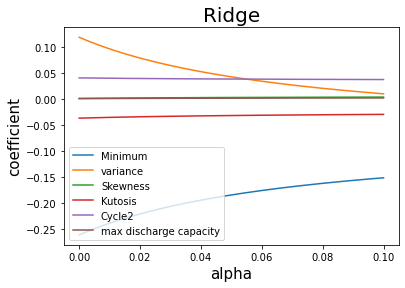

In [41]:
Y=[]
X=[]
for i in np.linspace(0,0.1,1000):
    regrplot=Ridge(alpha=i)
    regrplot.fit(Train,label)
    Y.append(regrplot.coef_)
    X.append(i)
Y_=np.array(Y)    
plt.plot(X,Y_[:,0],label='Minimum')
plt.plot(X,Y_[:,1],label='variance')
plt.plot(X,Y_[:,2],label='Skewness')
plt.plot(X,Y_[:,3],label='Kutosis')
plt.plot(X,Y_[:,4],label='Cycle2')
plt.plot(X,Y_[:,5],label='max discharge capacity')
plt.title('Ridge',size=20)
plt.xlabel('alpha',size=15)
plt.ylabel('coefficient',size=15)
plt.legend()
plt.show

C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.055547544960906706, tolerance: 0.00010703521221153374
  positive)
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010543215919887883, tolerance: 0.00010703521221153374
  positive)
C:\Users\JanggoonKim\anaco

<function matplotlib.pyplot.show(close=None, block=None)>

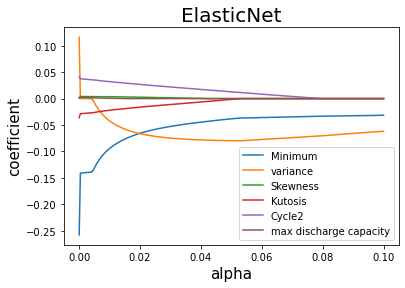

In [42]:
from sklearn.linear_model import ElasticNet
Y=[]
X=[]
for i in np.linspace(0,0.1,1000):
    regrplot=ElasticNet(alpha=i)
    regrplot.fit(Train,label)
    Y.append(regrplot.coef_)
    X.append(i)
Y_=np.array(Y)    
plt.plot(X,Y_[:,0],label='Minimum')
plt.plot(X,Y_[:,1],label='variance')
plt.plot(X,Y_[:,2],label='Skewness')
plt.plot(X,Y_[:,3],label='Kutosis')
plt.plot(X,Y_[:,4],label='Cycle2')
plt.plot(X,Y_[:,5],label='max discharge capacity')
plt.title('ElasticNet',size=20)
plt.xlabel('alpha',size=15)
plt.ylabel('coefficient',size=15)
plt.legend()
plt.show

In [43]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=4).fit(Train,label)
print('Lasso CV alpha:',reg.alpha_)
print('Lasso CV coefficient:',reg.coef_)
print('Lasso CV intercept:',reg.intercept_)

Lasso CV alpha: 0.0011054304792167608
Lasso CV coefficient: [-0.14025857 -0.          0.00370369 -0.02792338  0.03660103  0.00182735]
Lasso CV intercept: 2.793969897643637


In [44]:
Lassocv=reg.predict(Train)
rmseLassocv=np.sqrt(mean_squared_error(10**label,10**Lassocv))
print('RMSE','           ','MAPE')
print(rmseLassocv,MAPE(10**label,10**Lassocv))

RMSE             MAPE
74.50425071503675 9.824526071550292


In [45]:
Lassocv2=reg.predict(Train2)
rmseLassocv2=np.sqrt(mean_squared_error(10**label2,10**Lassocv2))
print('RMSE','           ','MAPE')
print(rmseLassocv2,MAPE(10**label2,10**Lassocv2))

RMSE             MAPE
209.16365561472446 16.975965665257277


In [46]:
Lassocv3=reg.predict(Train3)
rmseLassocv3=np.sqrt(mean_squared_error(10**label3,10**Lassocv3))
print('RMSE','           ','MAPE')
print(rmseLassocv3,MAPE(10**label3,10**Lassocv3))

RMSE             MAPE
224.8881796193635 11.592395563476568


In [47]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=4).fit(Train,label)
print('Ridge CV alpha:',reg.alpha_)
print('Ridge CV coefficient:',reg.coef_)
print('Ridge CV intercept:',reg.intercept_)

Ridge CV alpha: 10.0
Ridge CV coefficient: [-0.06193836 -0.06110072  0.01174385 -0.01611264  0.02941059  0.00712269]
Ridge CV intercept: 2.7939698976436373


In [48]:
Ridgecv=reg.predict(Train)
rmseRidgecv=np.sqrt(mean_squared_error(10**label,10**Ridgecv))
print('RMSE','           ','MAPE')
print(rmseRidgecv,MAPE(10**label,10**Ridgecv))

RMSE             MAPE
89.61316760432994 11.027709527661592


In [49]:
Ridgecv2=reg.predict(Train2)
rmseRidgecv2=np.sqrt(mean_squared_error(10**label2,10**Ridgecv2))
print('RMSE','           ','MAPE')
print(rmseRidgecv2,MAPE(10**label2,10**Ridgecv2))

RMSE             MAPE
99.7248751411351 15.704251294035002


In [50]:
Ridgecv3=reg.predict(Train3)
rmseRidgecv3=np.sqrt(mean_squared_error(10**label3,10**Ridgecv3))
print('RMSE','           ','MAPE')
print(rmseRidgecv3,MAPE(10**label3,10**Ridgecv3))

RMSE             MAPE
207.87089059701142 12.186787132746483


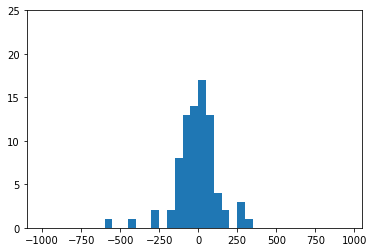

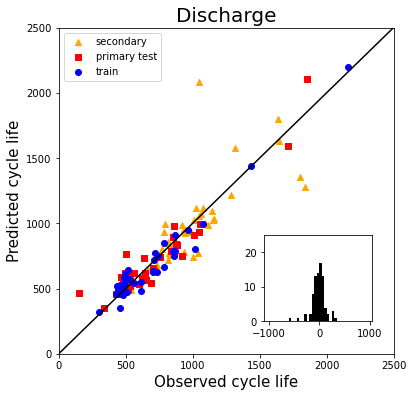

In [51]:
#2 Lasso
s_res=(10**Lassocv3)-(10**label3)
p_res=(10**Lassocv2)-(10**label2)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**Lassocv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**Lassocv2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**Lassocv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=15)
plt.ylabel('Predicted cycle life',size=15)
plt.axis([0,2500,0,2500])
plt.title('Discharge',size=20)
plt.legend()
ax_sub=plt.axes([0.6,0.2,0.25,0.2])
plt.ylim(0,25)
ax_sub.hist(his,bins,color='black')
plt.show()

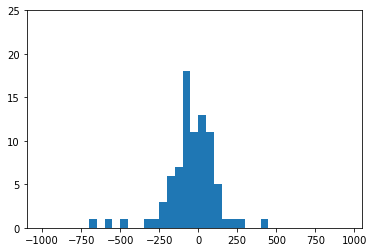

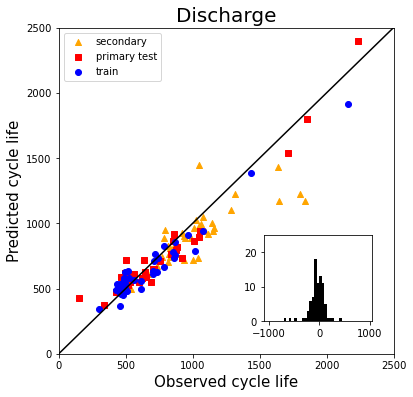

In [52]:
#2 Ridge
s_res=(10**Ridgecv3)-(10**label3)
p_res=(10**Ridgecv2)-(10**label2)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label3,10**Ridgecv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label2,10**Ridgecv2,color='red',marker='s',label='primary test')
plt.scatter(10**label,10**Ridgecv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=15)
plt.ylabel('Predicted cycle life',size=15)
plt.axis([0,2500,0,2500])
plt.title('Discharge',size=20)
plt.legend()
ax_sub=plt.axes([0.6,0.2,0.25,0.2])
plt.ylim(0,25)
ax_sub.hist(his,bins,color='black')
plt.show()